## **Initial Analysis of Credit Risk Report**

**Group 22:** Cristina Flores, Elliot Quinn, Maysa Sheikh, Samadarshini Kasam, Shumaila Afzal

**Data set:** https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data

**Target Variable:** Binary variable where outcome 1 predicts Approval and 0 predicts Disapproval

## **Problem Statement**

This study seeks to understand the factors that lead to credit or loan application’s approval by banks and/ or other credit institutions. We will be applying different data mining techniques for our analysis to assess the factors that strongly correlate to a positive outcome. With the chosen dataset our aim is to build a model that us to classify new cases' likelihood of being approved with a strong accuracy score.

## **Financial & Social Implications of a potential solution**

Since credit or lending institutions mobilize the wealth of the economy, hence their function is a core component of economic development. It is necessary for such institutions to assess an applicant's creditowrthiness to ascertain that the amount lent will not only be recoverable but also provide returns and not incur losses. A flourishing economy causes society to flourish as a whole. The growth of businesses increases jobs, which in turn increases job opportunities and the spending and consumption by consumers.

Some financial implications of a potential solution to the credit and loan approval can include reduced rejection rates, increased credit, and long-term economic growth. If the solution implements a clear and fair algorithm, we may find more applicants getting approved- creating profit for financial institutions. In addition, a fair process can also lead to increased access to credit, especially those who were denied credit/loans in the past. Making the overall lending process efficient and fair.

### **Import Necessary Packages:**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import tree

### **Load Data:**

In [ ]:
# Dataset is from Online Repository

from google.colab import files
uploaded = files.upload()

import io
creditrisk = pd.read_csv(io.BytesIO(uploaded['credit_risk_dataset.csv']))
creditrisk = pd.read_csv('credit_risk_dataset.csv')

Saving credit_risk_dataset.csv to credit_risk_dataset.csv


In [ ]:
creditrisk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
# Assess target variable distribution
target_distribution = creditrisk['loan_status'].value_counts()
print(target_distribution)

loan_status
0    25473
1     7108
Name: count, dtype: int64


<Axes: >

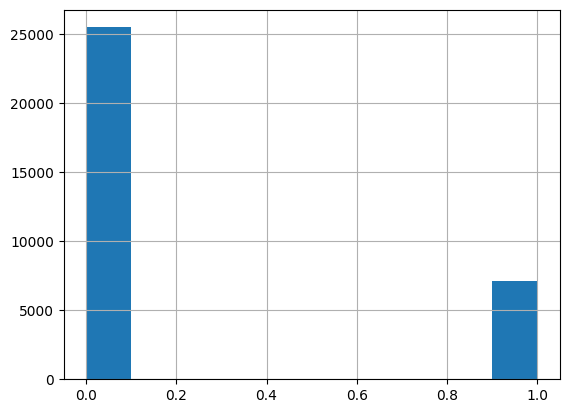

In [ ]:
creditrisk.loan_status.hist()

<Axes: >

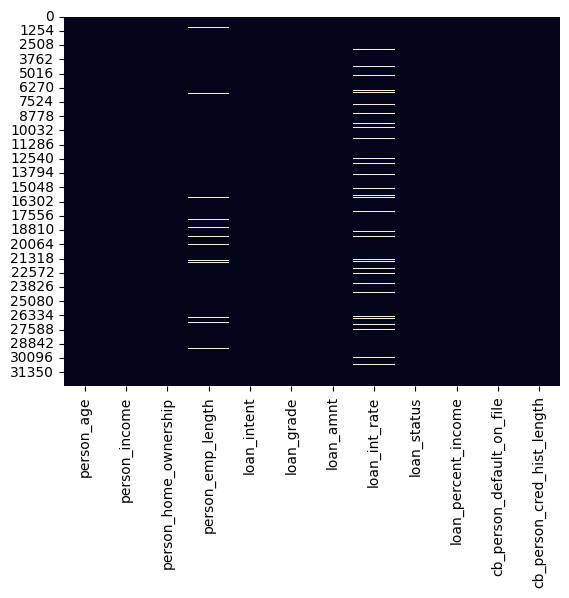

In [ ]:
# Explore missing values

sns.heatmap(creditrisk.isnull(), cbar=False)

In [ ]:
# Calculate median for 'loan_int_rate' and 'person_emp_length'
median_loan_int = creditrisk['loan_int_rate'].mean()
median_emp_length = creditrisk['person_emp_length'].mean()

# Replace NaN values in the respective columns with the calculated medians
creditrisk['loan_int_rate'].fillna(value=median_loan_int, inplace=True)
creditrisk['person_emp_length'].fillna(value=median_emp_length, inplace=True)

In [ ]:
# Examine missing values
print(creditrisk.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [ ]:
creditrisk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


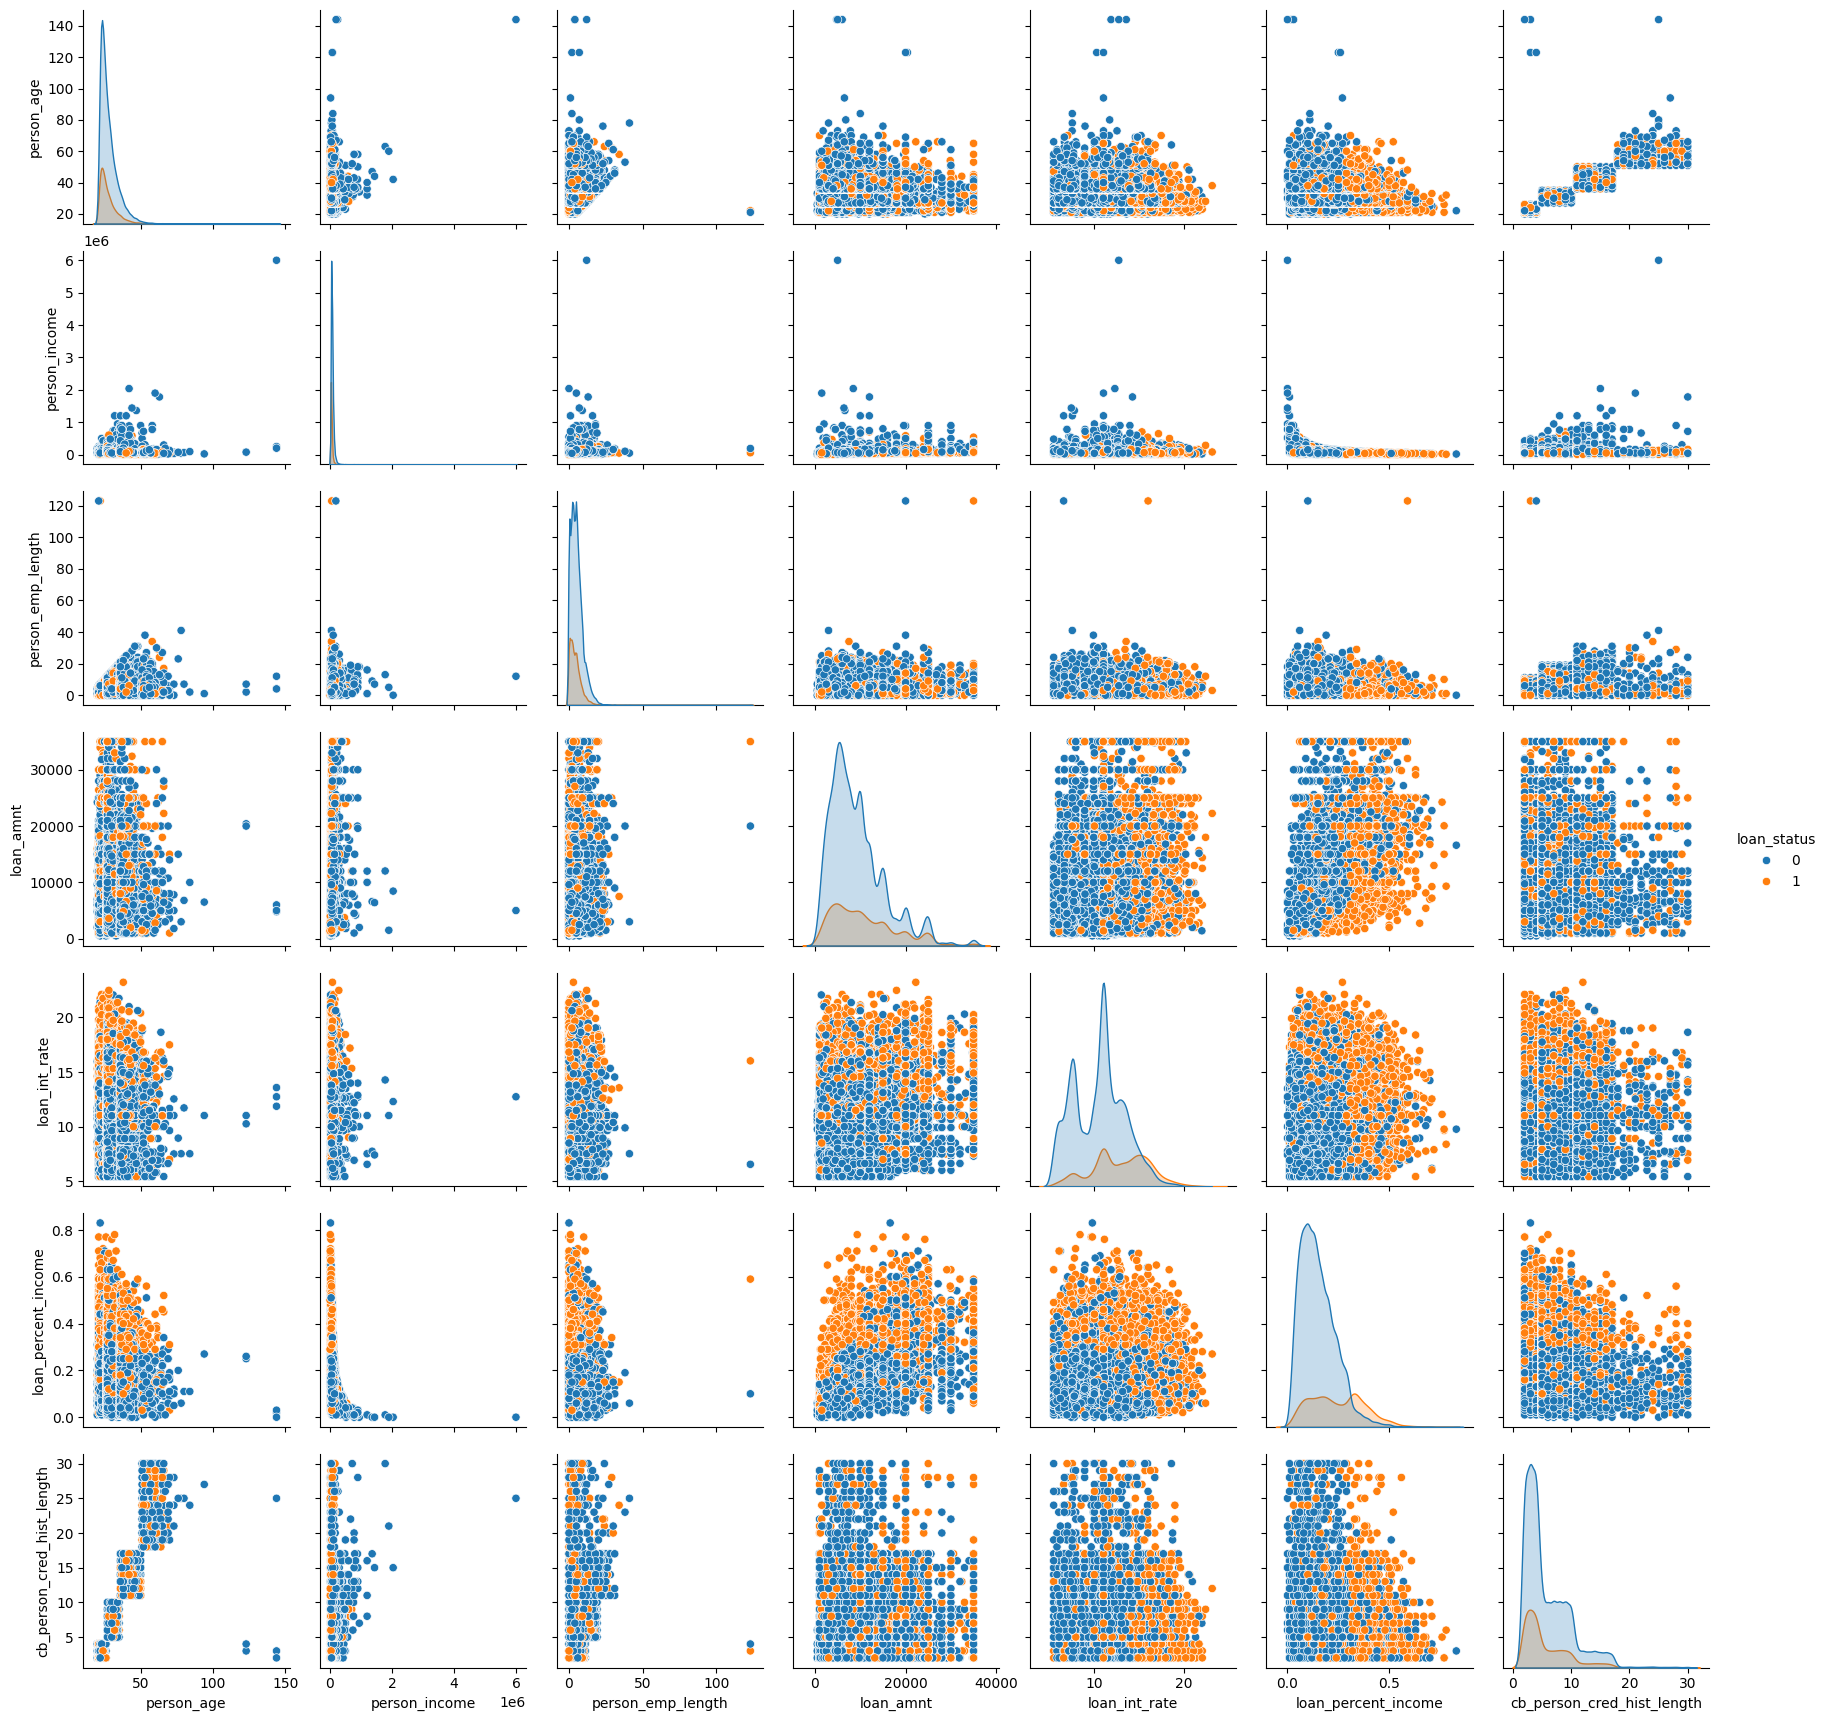

In [ ]:
sns.pairplot(creditrisk, hue = 'loan_status')

**Age's Influence on Loan Approval:**

Younger individuals have a higher likelihood of loan approval.

**Age's Influence on Interest Rates:**

Interest rates generally rise as the borrower's age increases.

**Employment Length and Interest Rates Relationship:**

Higher interest rates are typically associated with shorter employment lengths.

**Loan Amount's Influence on Approval Rates:**

Smaller loan amounts often result in higher approval rates.

In [ ]:
creditrisk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


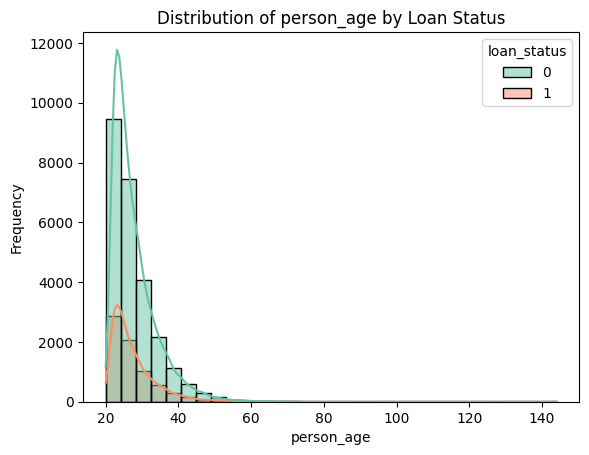

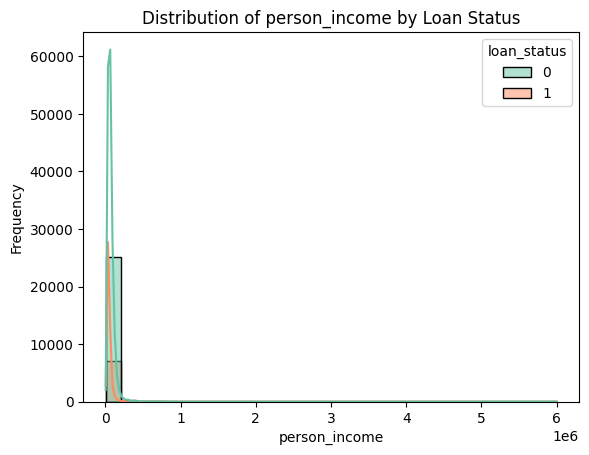

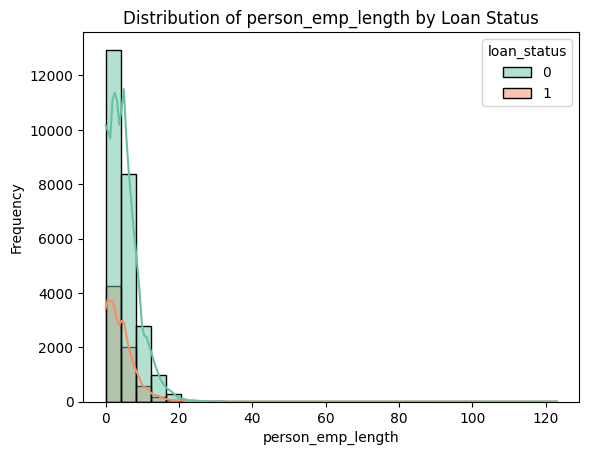

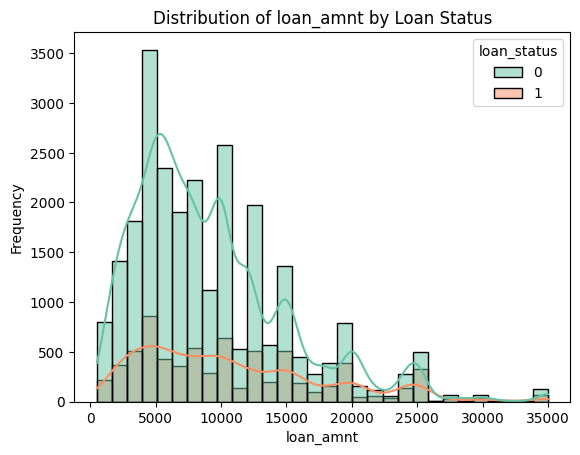

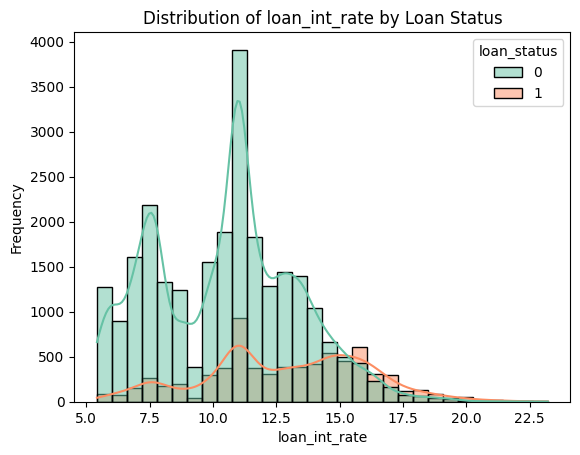

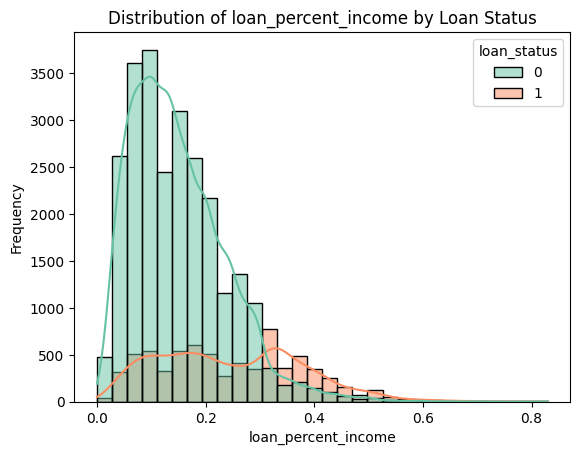

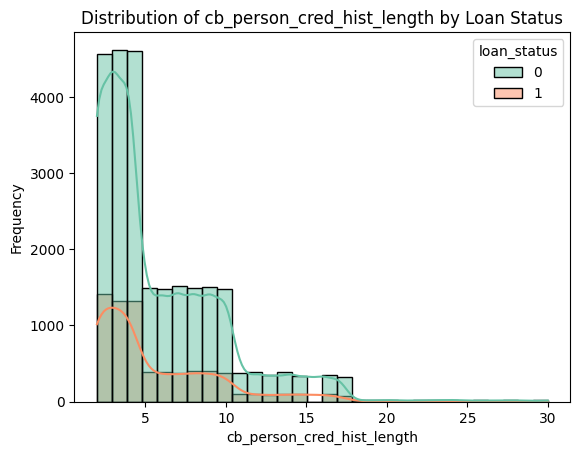

In [ ]:
continuous_vars = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
for var in continuous_vars:
    sns.histplot(data=creditrisk, x=var, hue='loan_status', kde=True, bins=30, palette='Set2')
    plt.title(f'Distribution of {var} by Loan Status')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

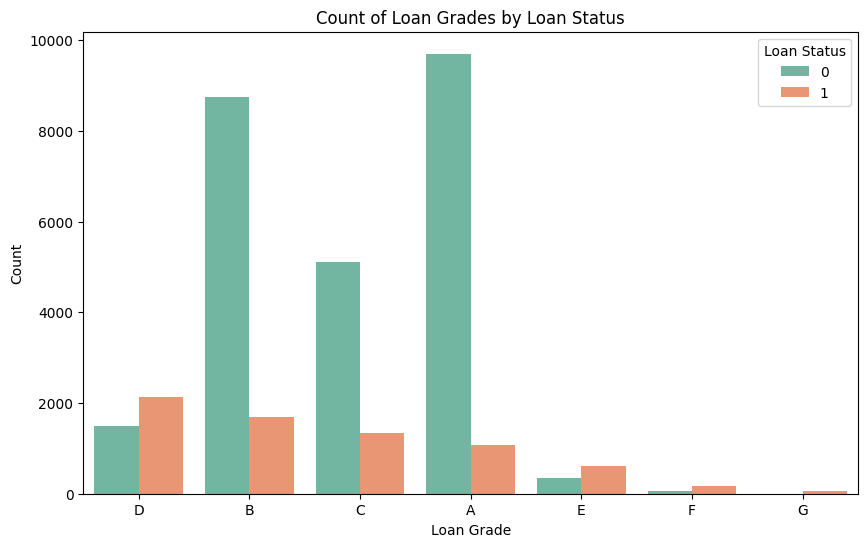

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for 'loan_grade' based on loan_status
plt.figure(figsize=(10, 6))
sns.countplot(data=creditrisk, x='loan_grade', hue='loan_status', palette='Set2')
plt.title('Count of Loan Grades by Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [ ]:
creditrisk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.085333,6322.086646,3.081605,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
creditrisk = pd.get_dummies(creditrisk)

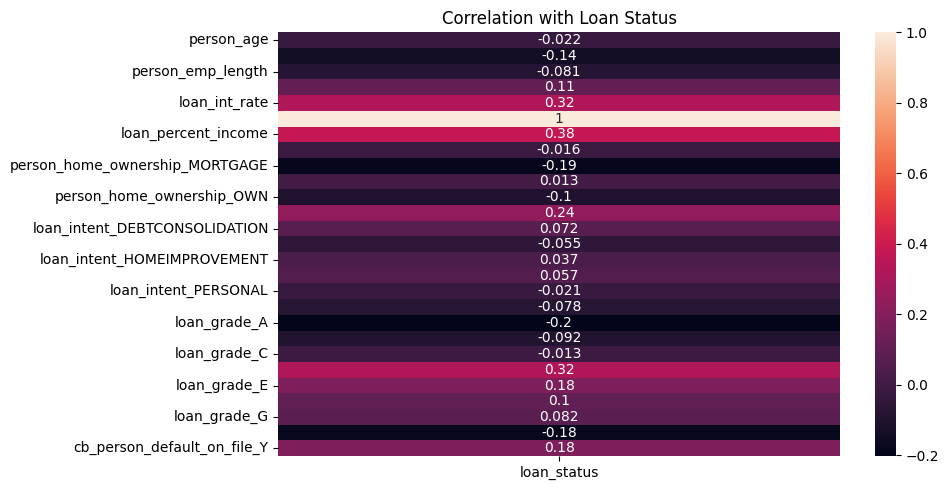

In [ ]:
plt.figure(figsize=(10,5))
corr_plot = sns.heatmap(creditrisk.corr()[['loan_status']], annot=True,)
plt.title('Correlation with Loan Status')
plt.tight_layout()
plt.show()

# Scaling the Dataset

In [ ]:
creditrisk.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,False,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,1,0.57,3,True,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
scaler = MinMaxScaler() # Using MinMax Scaler to scale the data
X = creditrisk.drop('loan_status', axis=1)
X_rescaled = scaler.fit_transform(X)
X_rescaled = pd.DataFrame(X_rescaled, columns=X.columns)

In [ ]:
X_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.016129,0.009173,1.000000,1.000000,0.595506,0.710843,0.035714,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.008065,0.000934,0.040650,0.014493,0.321348,0.120482,0.000000,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.040323,0.000934,0.008130,0.144928,0.418539,0.686747,0.035714,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.024194,0.010257,0.032520,1.000000,0.551124,0.638554,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.032258,0.008406,0.065041,1.000000,0.497191,0.662651,0.071429,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Logistic Regression

In [ ]:
y = creditrisk['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

In [ ]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

array([[7305,  321],
       [ 970, 1179]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      7626
           1       0.79      0.55      0.65      2149

    accuracy                           0.87      9775
   macro avg       0.83      0.75      0.78      9775
weighted avg       0.86      0.87      0.86      9775



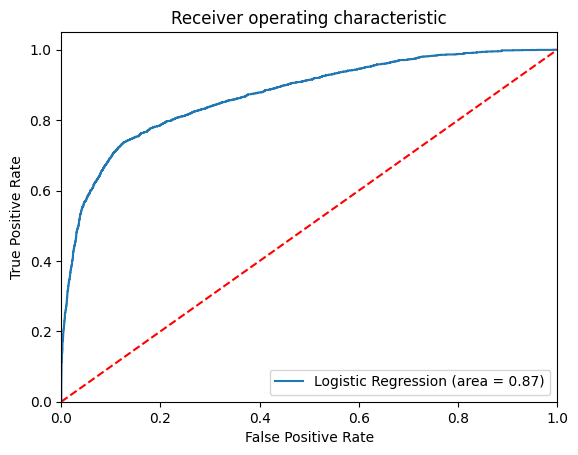

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
logit_fpr, logit_tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(logit_fpr, logit_tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# kNN Model

In [ ]:
X_rescaled.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
count,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,...,32581.000000,32581.000000,32581.00000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,0.062376,0.010353,0.038941,0.263460,0.314140,0.205064,0.135865,0.412633,0.003284,0.079310,...,0.175532,0.330776,0.32077,0.198214,0.111292,0.029588,0.007397,0.001964,0.823670,0.176330
std,0.051194,0.010337,0.033214,0.183249,0.173124,0.128653,0.144821,0.492315,0.057214,0.270226,...,0.380427,0.470500,0.46678,0.398660,0.314498,0.169450,0.085688,0.044278,0.381106,0.381106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.024194,0.005754,0.016260,0.130435,0.172472,0.108434,0.035714,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.048387,0.008506,0.032520,0.217391,0.314140,0.180723,0.071429,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.080645,0.012542,0.056911,0.339130,0.432022,0.277108,0.214286,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Determine the optimal value of k based on ROC AUC using cross-validation
max_K = 100
cv_scores = []

for K in range(1, max_K):
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="roc_auc")
    cv_scores.append(scores.mean())

In [ ]:
cv_scores[:10]

[0.7780996438985506,
 0.8219233344402641,
 0.8411816861437792,
 0.8520552137903328,
 0.8577812215795253,
 0.861028385888622,
 0.8645537341353892,
 0.8679935730999174,
 0.8690405791343012,
 0.8697814932068901]

In [ ]:
# Find the index of the maximum ROC AUC value
optimal_k_index = np.argmax(cv_scores)

# Retrieve the optimal k value
optimal_k = optimal_k_index + 1  # Adding 1 because K ranges from 1 to max_K, not from 0 to max_K-1

# Retrieve the maximum ROC AUC value
max_roc_auc = cv_scores[optimal_k_index]

# Print the results
print('Optimal k for maximum ROC AUC:', optimal_k)
print('Maximum ROC AUC:', max_roc_auc)


Optimal k for maximum ROC AUC: 30
Maximum ROC AUC: 0.8794320784609951


In [ ]:
knn = KNeighborsClassifier(n_neighbors=30, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=30)

In [ ]:
y_pred_knn = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[7480  146]
 [ 989 1160]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      7626
           1       0.89      0.54      0.67      2149

    accuracy                           0.88      9775
   macro avg       0.89      0.76      0.80      9775
weighted avg       0.88      0.88      0.87      9775



In [ ]:
from sklearn.metrics import roc_auc_score

print('ROC AUC: ', roc_auc_score(y_test,y_pred))

ROC AUC:  0.7532672141068668


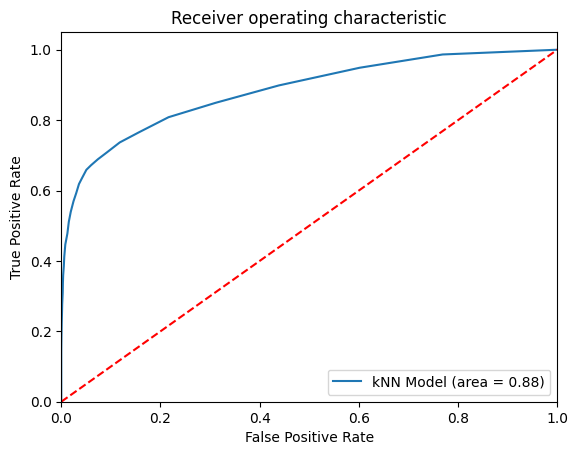

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

kNN_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(knn_fpr, knn_tpr, label='kNN Model (area = %0.2f)' % kNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

confusion_matrix(y_test,y_pred_rf)

array([[7591,   35],
       [ 871, 1278]])

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      7626
           1       0.97      0.59      0.74      2149

    accuracy                           0.91      9775
   macro avg       0.94      0.80      0.84      9775
weighted avg       0.91      0.91      0.90      9775



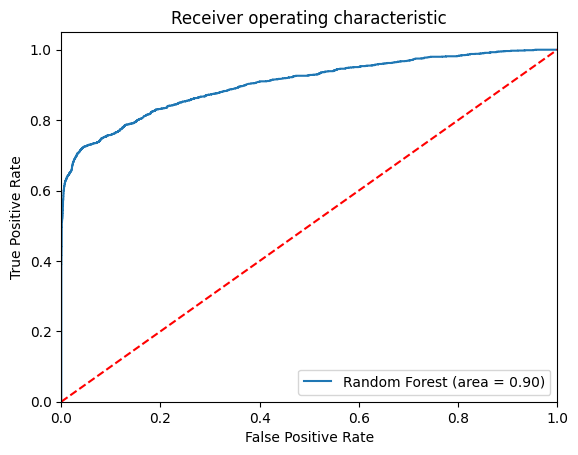

In [ ]:
# Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Rf_ROC')
plt.show()

# Boosted Tree

In [ ]:
# Boosted tree model

from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

In [ ]:
y_pred_bt = bt_model.predict(X_test)

confusion_matrix(y_test,y_pred_bt)

array([[7292,  334],
       [ 780, 1369]])

In [ ]:
print(classification_report(y_test,y_pred_bt))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7626
           1       0.80      0.64      0.71      2149

    accuracy                           0.89      9775
   macro avg       0.85      0.80      0.82      9775
weighted avg       0.88      0.89      0.88      9775



In [ ]:
from sklearn.metrics import roc_auc_score

print('ROC AUC: ', roc_auc_score(y_test,y_pred))

ROC AUC:  0.7532672141068668


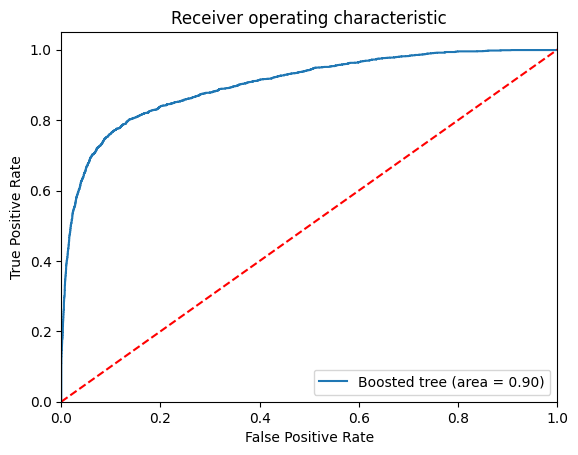

In [ ]:
# Boosted Tree
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('BT_ROC')
plt.show()

# Naive Bayes

In [ ]:
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)


MultinomialNB(alpha=0.01)

In [ ]:
y_pred_nb = delays_nb.predict(X_test)

print(confusion_matrix(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))

[[7073  553]
 [1255  894]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7626
           1       0.62      0.42      0.50      2149

    accuracy                           0.82      9775
   macro avg       0.73      0.67      0.69      9775
weighted avg       0.80      0.82      0.80      9775



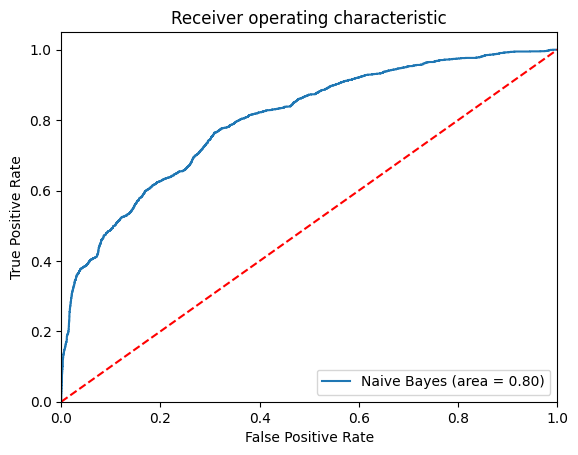

In [ ]:
nb_roc_auc = roc_auc_score(y_test, delays_nb.predict_proba(X_test)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, delays_nb.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Naives_ROC')
plt.show()

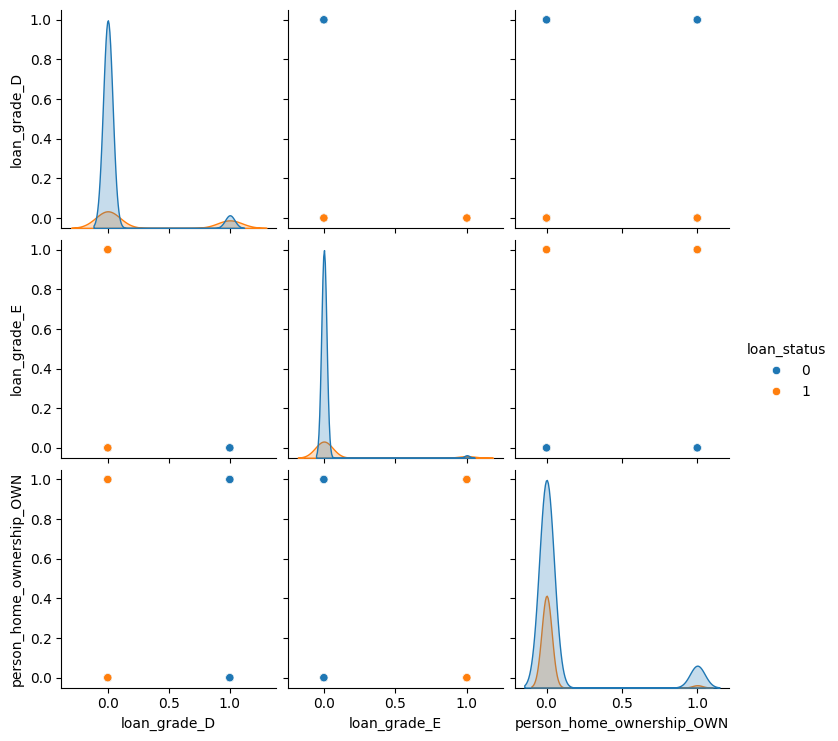

In [ ]:
x_y = pd.concat([X_test,y_test], axis=1)

sns.pairplot(x_y[['loan_grade_D','loan_grade_E','person_home_ownership_OWN','loan_status']], hue='loan_status')

1. A smaller loan amount significantly increases the likelihood of approval.
2. With higher interest rates, the probability of loan approval also rises.

# Artificial Neural Network

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
creditrisk.shape

(32581, 27)

In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes= 27, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=27, random_state=1)

In [ ]:
y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

[[7379  247]
 [ 804 1345]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7626
           1       0.84      0.63      0.72      2149

    accuracy                           0.89      9775
   macro avg       0.87      0.80      0.83      9775
weighted avg       0.89      0.89      0.89      9775



In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))

ROC AUC:  0.8951911592398321


In [ ]:
from sklearn.model_selection import cross_val_score
min_hidden_layer_size = 5
max_hidden_layer_size = 30
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='logistic', solver='adam', max_iter=1000, random_state=1)
    scores = cross_val_score(MLPC_model,X_train,y_train.values.ravel(),cv = 5,scoring = "roc_auc")
    cv_scores.append(scores.mean())

We introduced the max_iter parameter in response to convergence warnings encountered during the training process. Initially, we set max_iter to 100, but even after incrementally increasing it up to 900, the convergence warnings persisted. Consequently, we made the decision to further extend the maximum number of iterations to 1000. This adjustment was made to provide the MLPClassifier with an ample training duration, allowing it additional iterations to converge to a stable solution. By setting max_iter=1000, we aimed to effectively address the convergence issues observed earlier and ensure the model's reliability and predictive accuracy. Monitoring the training process closely enabled us to make informed decisions regarding the max_iter parameter and optimize the MLPClassifier's performance while mitigating convergence concerns.

<Axes: >

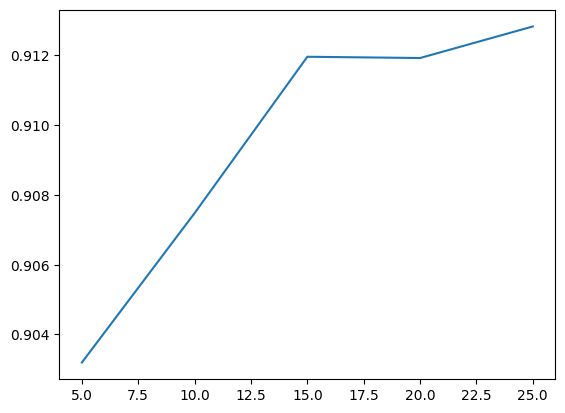

In [ ]:
sns.lineplot(x=range(min_hidden_layer_size,max_hidden_layer_size,5), y=cv_scores)

In [ ]:
max_Roc_auc = max(cv_scores)  # Find the maximum Roc_auc
optimal_hidden_nodes = range(min_hidden_layer_size, max_hidden_layer_size, 5)[cv_scores.index(max_Roc_auc)]  # Find the corresponding number of hidden nodes

print("Maximum Roc_auc:", max_Roc_auc)
print("Number of Hidden Nodes for Maximum Roc_auc:", optimal_hidden_nodes)

Maximum Roc_auc: 0.9128305209593934
Number of Hidden Nodes for Maximum Roc_auc: 25


In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes=25, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

[[7397  229]
 [ 776 1373]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7626
           1       0.86      0.64      0.73      2149

    accuracy                           0.90      9775
   macro avg       0.88      0.80      0.83      9775
weighted avg       0.89      0.90      0.89      9775



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))

ROC AUC:  0.9002082220494971


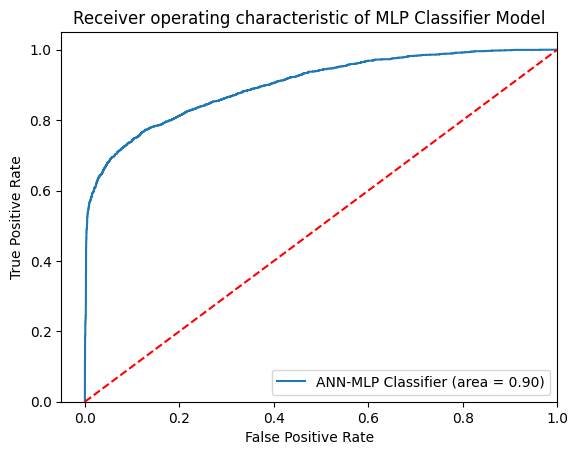

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

ann_roc_auc = roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1])
ann_fpr, ann_tpr, ann_thresholds = roc_curve(y_test, MLPC_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(ann_fpr, ann_tpr, label='ANN-MLP Classifier (area = %0.2f)' % ann_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of MLP Classifier Model')
plt.legend(loc="lower right")
plt.savefig('MLPC_ROC')
plt.show()

**ROC AUC Curve Coefficient**: Although the ROC AUC curve coefficient  decreases from 0.91 to 0.90 after reducing the number of nodes to 25, it still indicates very high discriminatory power of the model in distinguishing between classes.

# Deep Learning Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
dlcm_model = Sequential()
dlcm_model.add(Dense(units=100,activation='relu'))
dlcm_model.add(Dropout(0.5))
dlcm_model.add(Dense(units=50,activation='relu'))
dlcm_model.add(Dropout(0.5))
dlcm_model.add(Dense(units=25,activation='relu'))
dlcm_model.add(Dropout(0.5))
dlcm_model.add(Dense(units=1, activation='sigmoid'))
dlcm_model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
dlcm_model.fit(x=X_train,
          y=y_train,
          batch_size=128,
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5918 - val_loss: 0.4132
Epoch 2/200
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4524 - val_loss: 0.3664
Epoch 3/200
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3996 - val_loss: 0.3299
Epoch 4/200
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3730 - val_loss: 0.3098
Epoch 5/200
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3421 - val_loss: 0.2980
Epoch 6/200
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3286 - val_loss: 0.2896
Epoch 7/200
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3244 - val_loss: 0.2827
Epoch 8/200
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3115 - val_loss: 0.2796
Epoch 9/200
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3107 - val_loss: 0.2777
Epoch 10/200
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3031 - val_loss: 0.2744
Epoch 11/200
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3008 - val_loss: 0.2730
Epoch 12/200
179/179 ━━━━━━━━━━━━━━━━━━━━

<Axes: >

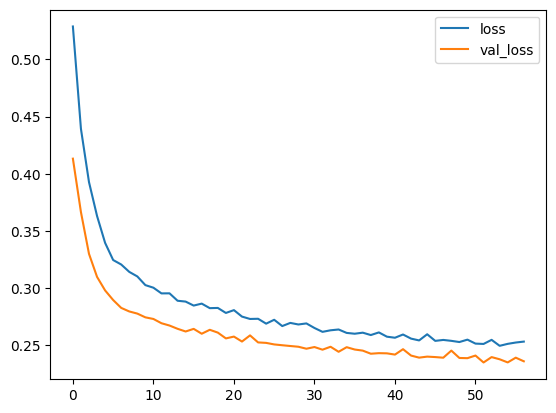

In [ ]:
model_loss = pd.DataFrame(dlcm_model.history.history)
model_loss.plot()

In [ ]:
y_pred_dlcm =(dlcm_model.predict(X_test) > 0.5).astype("int32")

306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(classification_report(y_test,y_pred_dlcm))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7626
           1       0.95      0.66      0.78      2149

    accuracy                           0.92      9775
   macro avg       0.93      0.83      0.87      9775
weighted avg       0.92      0.92      0.91      9775



In [ ]:
print(confusion_matrix(y_test,y_pred_dlcm))
print('ROC AUC: ', roc_auc_score(y_test,dlcm_model.predict(X_test)))

[[7559   67]
 [ 729 1420]]
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
ROC AUC:  0.9180363350039181


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


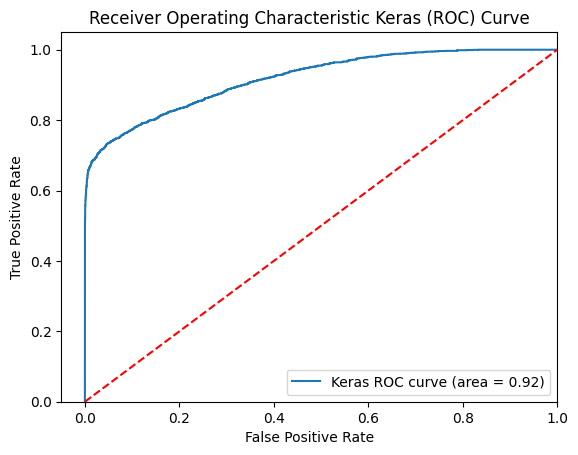

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

dlcm_roc_auc = roc_auc_score(y_test,dlcm_model.predict(X_test))
dlcm_fpr, dlcm_tpr, dlcm_thresholds = roc_curve(y_test, dlcm_model.predict(X_test))

# Plot ROC curve
plt.figure()
plt.plot(dlcm_fpr, dlcm_tpr, label='Keras ROC curve (area = %0.2f)' % dlcm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Keras (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('Keras_ROC')
plt.show()


# Final Curve

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


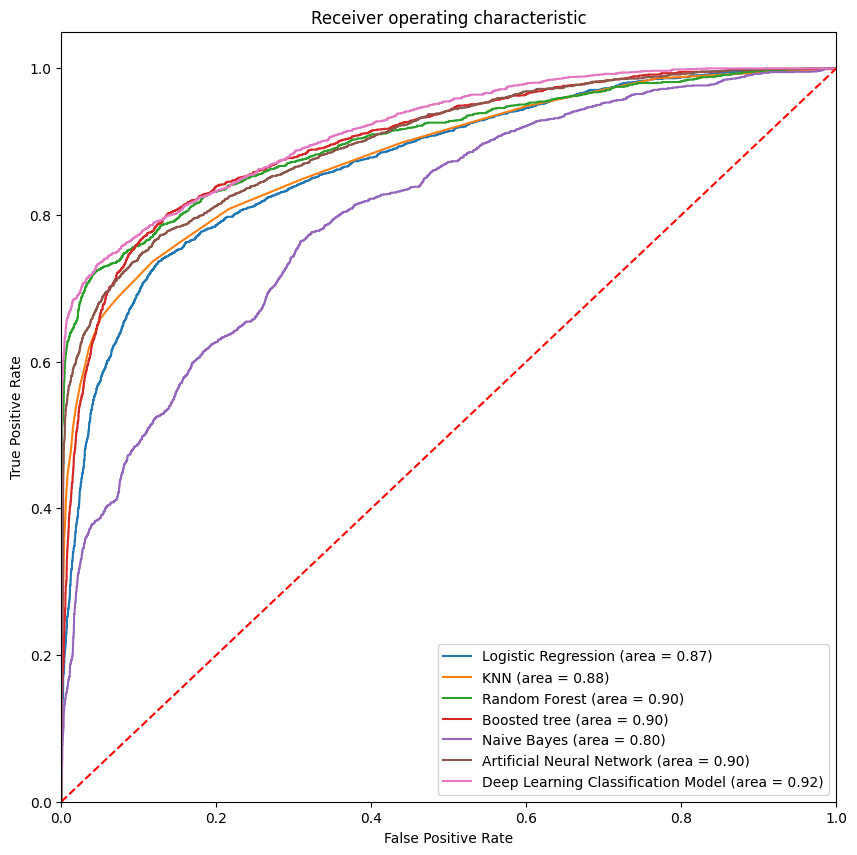

In [ ]:
# Logistic Regression
logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
logit_fpr, logit_tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

# kNN Model
kNN_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

# Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

# Boosted Tree
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

# Naive bayes
nb_roc_auc = roc_auc_score(y_test, delays_nb.predict_proba(X_test)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, delays_nb.predict_proba(X_test)[:,1])

# Artificial Neural Network
ann_roc_auc = roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1])
ann_fpr, ann_tpr, ann_thresholds = roc_curve(y_test, MLPC_model.predict_proba(X_test)[:,1])

# Deep Learning Classification Model
dlcm_roc_auc = roc_auc_score(y_test,dlcm_model.predict(X_test))
dlcm_fpr, dlcm_tpr, dlcm_thresholds = roc_curve(y_test, dlcm_model.predict(X_test))


plt.figure(figsize=(10, 10))
plt.plot(logit_fpr, logit_tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % kNN_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot(ann_fpr, ann_tpr, label='Artificial Neural Network (area = %0.2f)' % ann_roc_auc)
plt.plot(dlcm_fpr, dlcm_tpr, label='Deep Learning Classification Model (area = %0.2f)' % dlcm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Final ROC')
plt.show()

### **Assessing the performance of each model using the following metrics:**
## Recall, Precision, F1, ROC AUC:

**Logistic Model:**
The logistic model, commonly used for binary classification tasks, demonstrates an accuracy of 0.87, indicating its overall performance in predicting loan outcomes. However, a deeper analysis through the classification report reveals a significant discrepancy in recall between accepted (1) and rejected (0) loans. The model's ability to correctly identify accepted loans (recall) is notably lower at 0.55, implying that it struggles to capture all actual loan acceptances. Consequently, this leads to a moderate F1-score of 0.65 for accepted loans. In contrast, the model performs well in recalling rejected loans with a recall of 0.96, resulting in a high F1-score of 0.92 for this class. The ROC AUC score of 0.87 indicates the model's satisfactory ability to distinguish between accepted and rejected loans.

**kNN Model:**
The k-nearest neighbors (kNN) model, after optimization, achieves an accuracy of 0.88, surpassing the logistic model. Notably, it demonstrates improved precision (0.89) and recall (0.54) for accepted loans, resulting in a better F1-score of 0.67 for this class. However, it's essential to recognize that the recall for accepted loans remains relatively low, indicating that the model still struggles to capture all accepted loans accurately.

**Random Forest Model:**
The random forest model emerges as the top performer among all models, showcasing the highest accuracy of 0.91. It excels in precision (0.90) for rejected loans, indicating a higher proportion of correctly predicted rejections out of the total predicted rejections. However, this comes with a trade-off as the recall (0.59) for rejected loans is relatively lower compared to the logistic model, resulting in an F1-score of 0.74. Nevertheless, the model maintains a strong ability to distinguish between accepted and rejected loans, as evidenced by its ROC AUC score of 0.90.

**Boosted Tree Model:**
Similar to the random forest model, the boosted tree model attains an accuracy of 0.89. It strikes a balance between precision (0.80) and recall (0.64) for accepted loans, resulting in an F1-score of 0.71. This implies that the model captures a reasonable proportion of actual accepted loans out of the total actual accepted loans. The model's ability to distinguish between accepted and rejected loans is reflected in its ROC AUC score of 0.90, indicating a high discriminative ability.

**Naive Bayes Model:**
The naive Bayes model achieves an accuracy of 0.66. While it shows better recall for rejected loans (0.62) compared to accepted loans (0.42), suggesting a higher ability to identify actual rejections, its precision for both classes is relatively low. This impacts the overall F1-score. The ROC AUC score of 0.80 indicates a moderate ability to distinguish between loan acceptance and rejection.

**Inferences on Classification Results:**
- **Precision**: The random forest model demonstrates the highest precision for rejected loans, indicating a higher proportion of correctly predicted rejections out of the total predicted rejections.
- **Recall**: The boosted tree model performs the best in terms of recall for accepted loans, implying that it captures a reasonable proportion of actual accepted loans out of the total actual accepted loans.
- **F1 Score**: The random forest model achieves the highest F1-score among the models, suggesting a reasonable balance between precision and recall, though there's still room for improvement.
- **Accuracy**: With the highest accuracy, the random forest model outperforms others in overall predictive ability.

**Conclusion on Best Model:**
Considering the classification results and ROC AUC scores, the random forest model emerges as the best model among the options. It exhibits the highest accuracy of 0.91 and ROC AUC score of 0.90, indicating superior performance in distinguishing between loan acceptance and rejection compared to other models. The random forest model effectively balances precision and recall and demonstrates the highest accuracy, making it the most reliable choice for this classification task.